In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Breast_Cancer.csv")

In [14]:
# Mostrar las primeras filas para entender la estructura
print(df.head())

   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      1

In [31]:
# Verificar si hay valores nulos en las columnas necesarias
print(df[["Age", "Race", "Marital Status", "T Stage ","N Stage","6th Stage","differentiate","Grade","A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", "Reginol Node Positive", "Survival Months", "Status"]].isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [38]:
# Eliminar filas con valores nulos en las columnas necesarias
df_clean = df.dropna(subset=["Age", "Race", "Marital Status", "T Stage ","N Stage","6th Stage","differentiate",
                             "Grade","A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", 
                             "Reginol Node Positive", "Survival Months","Status"])

In [39]:
# Calcular la media de meses de supervivencia por estado civil
survival_by_marital = df_clean.groupby("Marital Status")["Survival Months"].mean()

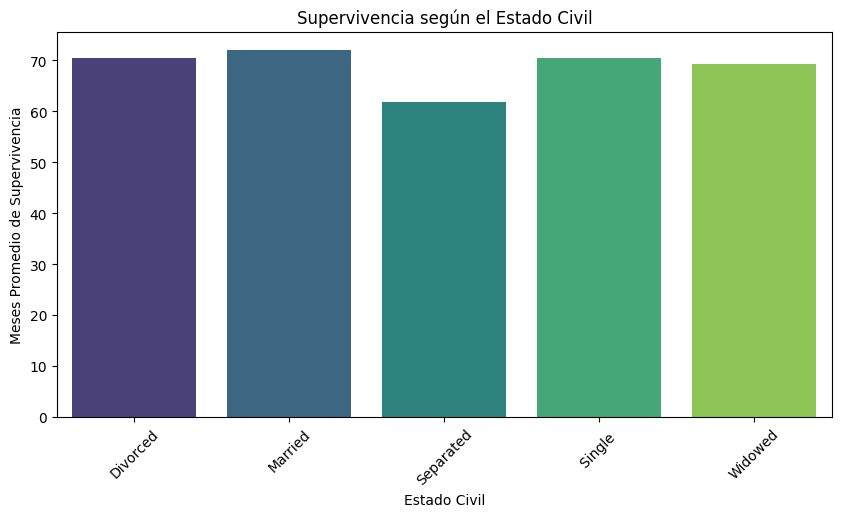

In [21]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_marital.index, y=survival_by_marital.values, hue=survival_by_marital.index, palette="viridis", legend=False)
plt.xlabel("Estado Civil")
plt.ylabel("Meses Promedio de Supervivencia")
plt.title("Supervivencia según el Estado Civil")
plt.xticks(rotation=45)  # Rotar etiquetas si son muchas
plt.show()

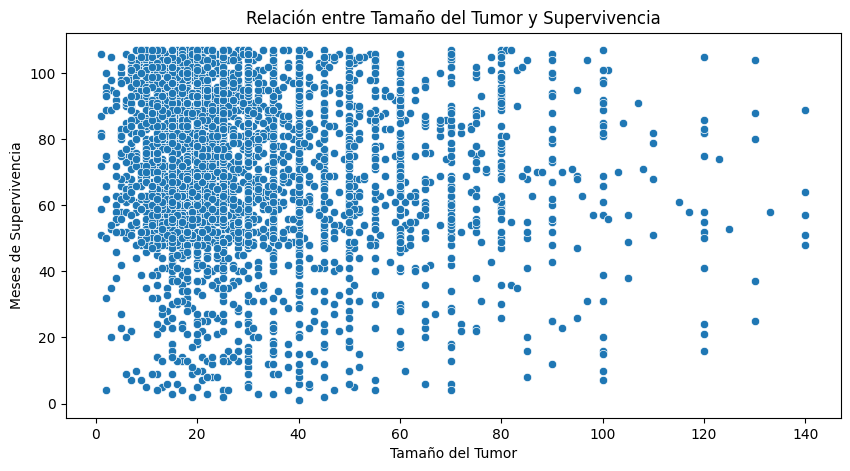

In [22]:
# Relación entre el Tamaño del Tumor y los Meses de Supervivencia
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Tumor Size"], y=df["Survival Months"])
plt.xlabel("Tamaño del Tumor")
plt.ylabel("Meses de Supervivencia")
plt.title("Relación entre Tamaño del Tumor y Supervivencia")
plt.show()

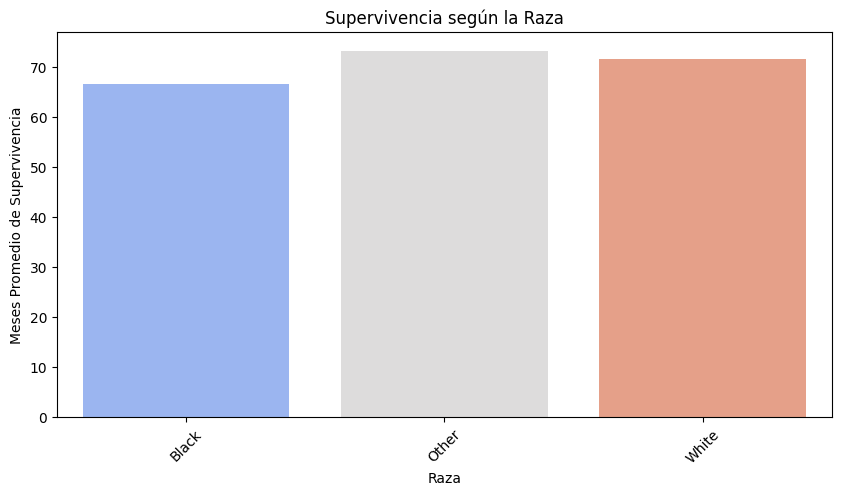

In [29]:
# Supervivencia Promedio según la Raza
survival_by_race = df.groupby("Race")["Survival Months"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=survival_by_race.index, y=survival_by_race.values, hue=survival_by_race.index, palette="coolwarm", legend=False)
plt.xlabel("Raza")
plt.ylabel("Meses Promedio de Supervivencia")
plt.title("Supervivencia según la Raza")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_164/3633829954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["T Stage "], y=df["Reginol Node Positive"], palette="pastel")


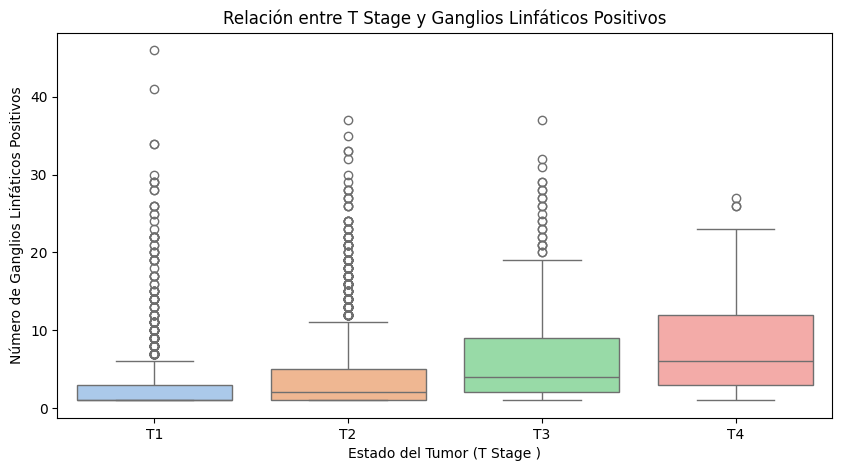

In [28]:
# Comparación del Número de Ganglios Linfáticos Positivos por Estado del Tumor (T Stage)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["T Stage "], y=df["Reginol Node Positive"], palette="pastel")
plt.xlabel("Estado del Tumor (T Stage )")
plt.ylabel("Número de Ganglios Linfáticos Positivos")
plt.title("Relación entre T Stage y Ganglios Linfáticos Positivos")
plt.show()

# En el estudio del cáncer de mama, los médicos analizan la cantidad de ganglios linfáticos positivos, 
# es decir, aquellos que contienen células cancerosas. 
# Esto ayuda a determinar la progresión del cáncer y el tratamiento necesario.